In [1]:
import data_smoothing
import find_peaks
import peak_character
import peak_classify
import feature_visualizer

In [174]:
data_nm, data_time, data_z = data_smoothing.load_data_csv('exp03_20180103 -t0 -chirp.csv', 900, 1400, 0.)

In [109]:
data_nm

array([ 901.571,  904.989,  908.408,  911.828,  915.247,  918.668,
        922.088,  925.509,  928.931,  932.353,  935.776,  939.198,
        942.622,  946.046,  949.47 ,  952.895,  956.32 ,  959.745,
        963.172,  966.598,  970.025,  973.452,  976.88 ,  980.309,
        983.737,  987.167,  990.596,  994.026,  997.457, 1000.89 ,
       1004.32 , 1007.75 , 1011.18 , 1014.62 , 1018.05 , 1021.48 ,
       1024.92 , 1028.35 , 1031.79 , 1035.22 , 1038.66 , 1042.09 ,
       1045.53 , 1048.97 , 1052.41 , 1055.84 , 1059.28 , 1062.72 ,
       1066.16 , 1069.6  , 1073.04 , 1076.48 , 1079.92 , 1083.37 ,
       1086.81 , 1090.25 , 1093.69 , 1097.14 , 1100.58 , 1104.03 ,
       1107.47 , 1110.92 , 1114.36 , 1117.81 , 1121.25 , 1124.7  ,
       1128.15 , 1131.6  , 1135.05 , 1138.49 , 1141.94 , 1145.39 ,
       1148.84 , 1152.3  , 1155.75 , 1159.2  , 1162.65 , 1166.1  ,
       1169.56 , 1173.01 , 1176.46 , 1179.92 , 1183.37 , 1186.83 ,
       1190.28 , 1193.74 , 1197.19 , 1200.65 , 1204.11 , 1207.

In [4]:
smooth_matx = data_smoothing.earth_smooth_matrix(data_nm, data_z)

/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [5]:
threshold = 0.75
mindist = 0
idx, height, fwhm = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [7]:
corrected_output = peak_classify.data_grouping(idx, height, fwhm)
corrected_output.describe()

,Position,Height,Width,Time
count,758.000000,758.000000,758.000000,758.000000
mean,46.616095,-0.001526,173.460897,341.346966
std,15.826223,0.000647,40.283201,201.244542
min,15.000000,-0.004840,75.358000,9.000000
25%,52.000000,-0.001417,161.780000,161.000000
50%,55.000000,-0.001330,168.643000,327.500000
75%,56.000000,-0.001236,185.791000,516.750000
max,58.000000,-0.001056,271.612000,706.000000


In [8]:
peak_dict = peak_classify.cluster_classifier(idx, corrected_output)

In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit

def visualize(peak_dict, data_nm):
    nm = pd.DataFrame(data_nm)
    for i in range(len(peak_dict)):
        nm_list = []
        df = pd.DataFrame(peak_dict['peak_%s' % i], 
        columns=['Position', 'Height', 'Width', 'Time'])
        df = df.drop_duplicates(subset= 'Time')
        df = df.reset_index(drop=True)
        for j in df['Position']:
            nm_list.append(nm.loc[j].values)
            
        df['Wavelength'] = nm_list
                
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), dpi=600)
        
        ax1.plot(df['Time'], df['Height'], '.')
        #ax1.plot(exp fit)
        #ax1.axis(between 0 and 1?)
        ax1.set_title('Peak %s Dynamics' % (i+1), fontsize=18, fontweight='bold')
        ax1.set_ylabel('Intensity', fontsize=18, fontweight='bold')
        ax1.grid()
        
        ax2.plot(df['Time'], df['Wavelength'], '.')
        ax2.plot(np.unique(df['Time']), np.poly1d(np.polyfit(df['Time'], df['Position'], 1))(np.unique(df['Time'])))
        ax2.set_ylabel('Wavelength $(nm)$', fontsize=18, fontweight='bold')
        ax2.set_xlabel('Time $(ps)$', fontsize=18, fontweight='bold')
        ax2.set_ylim((900, 1400))
        ax2.grid()
        
    return

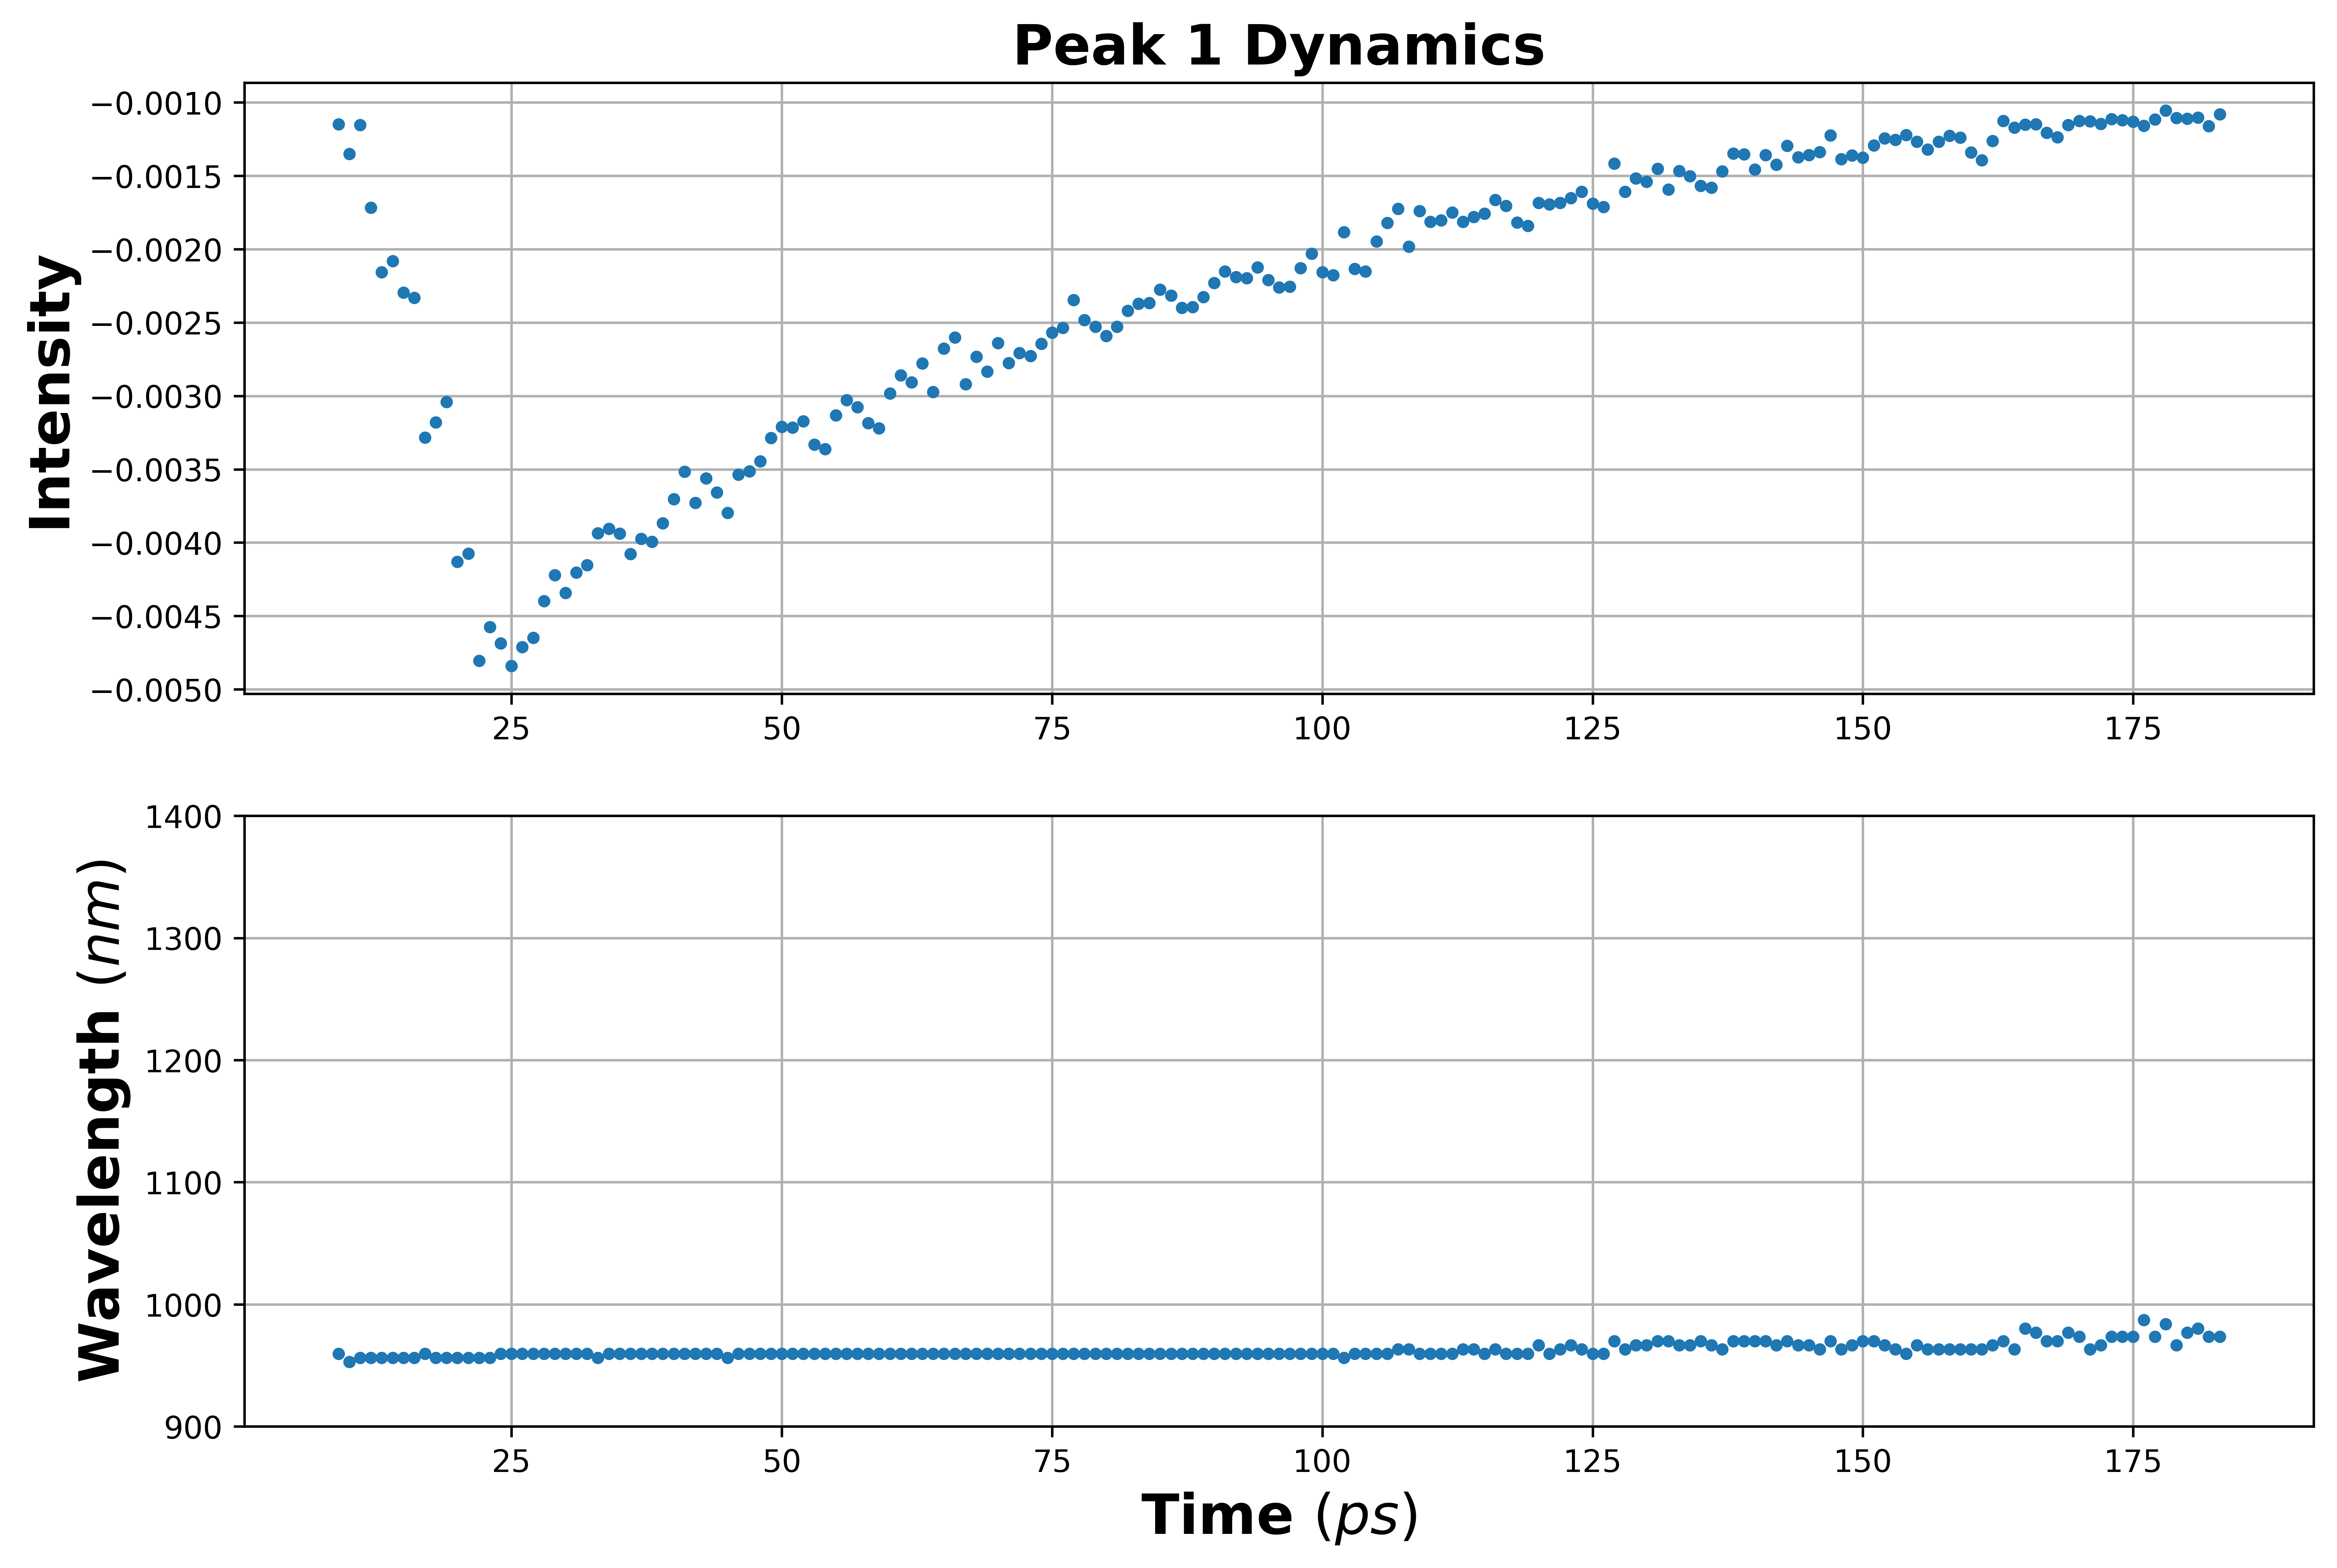

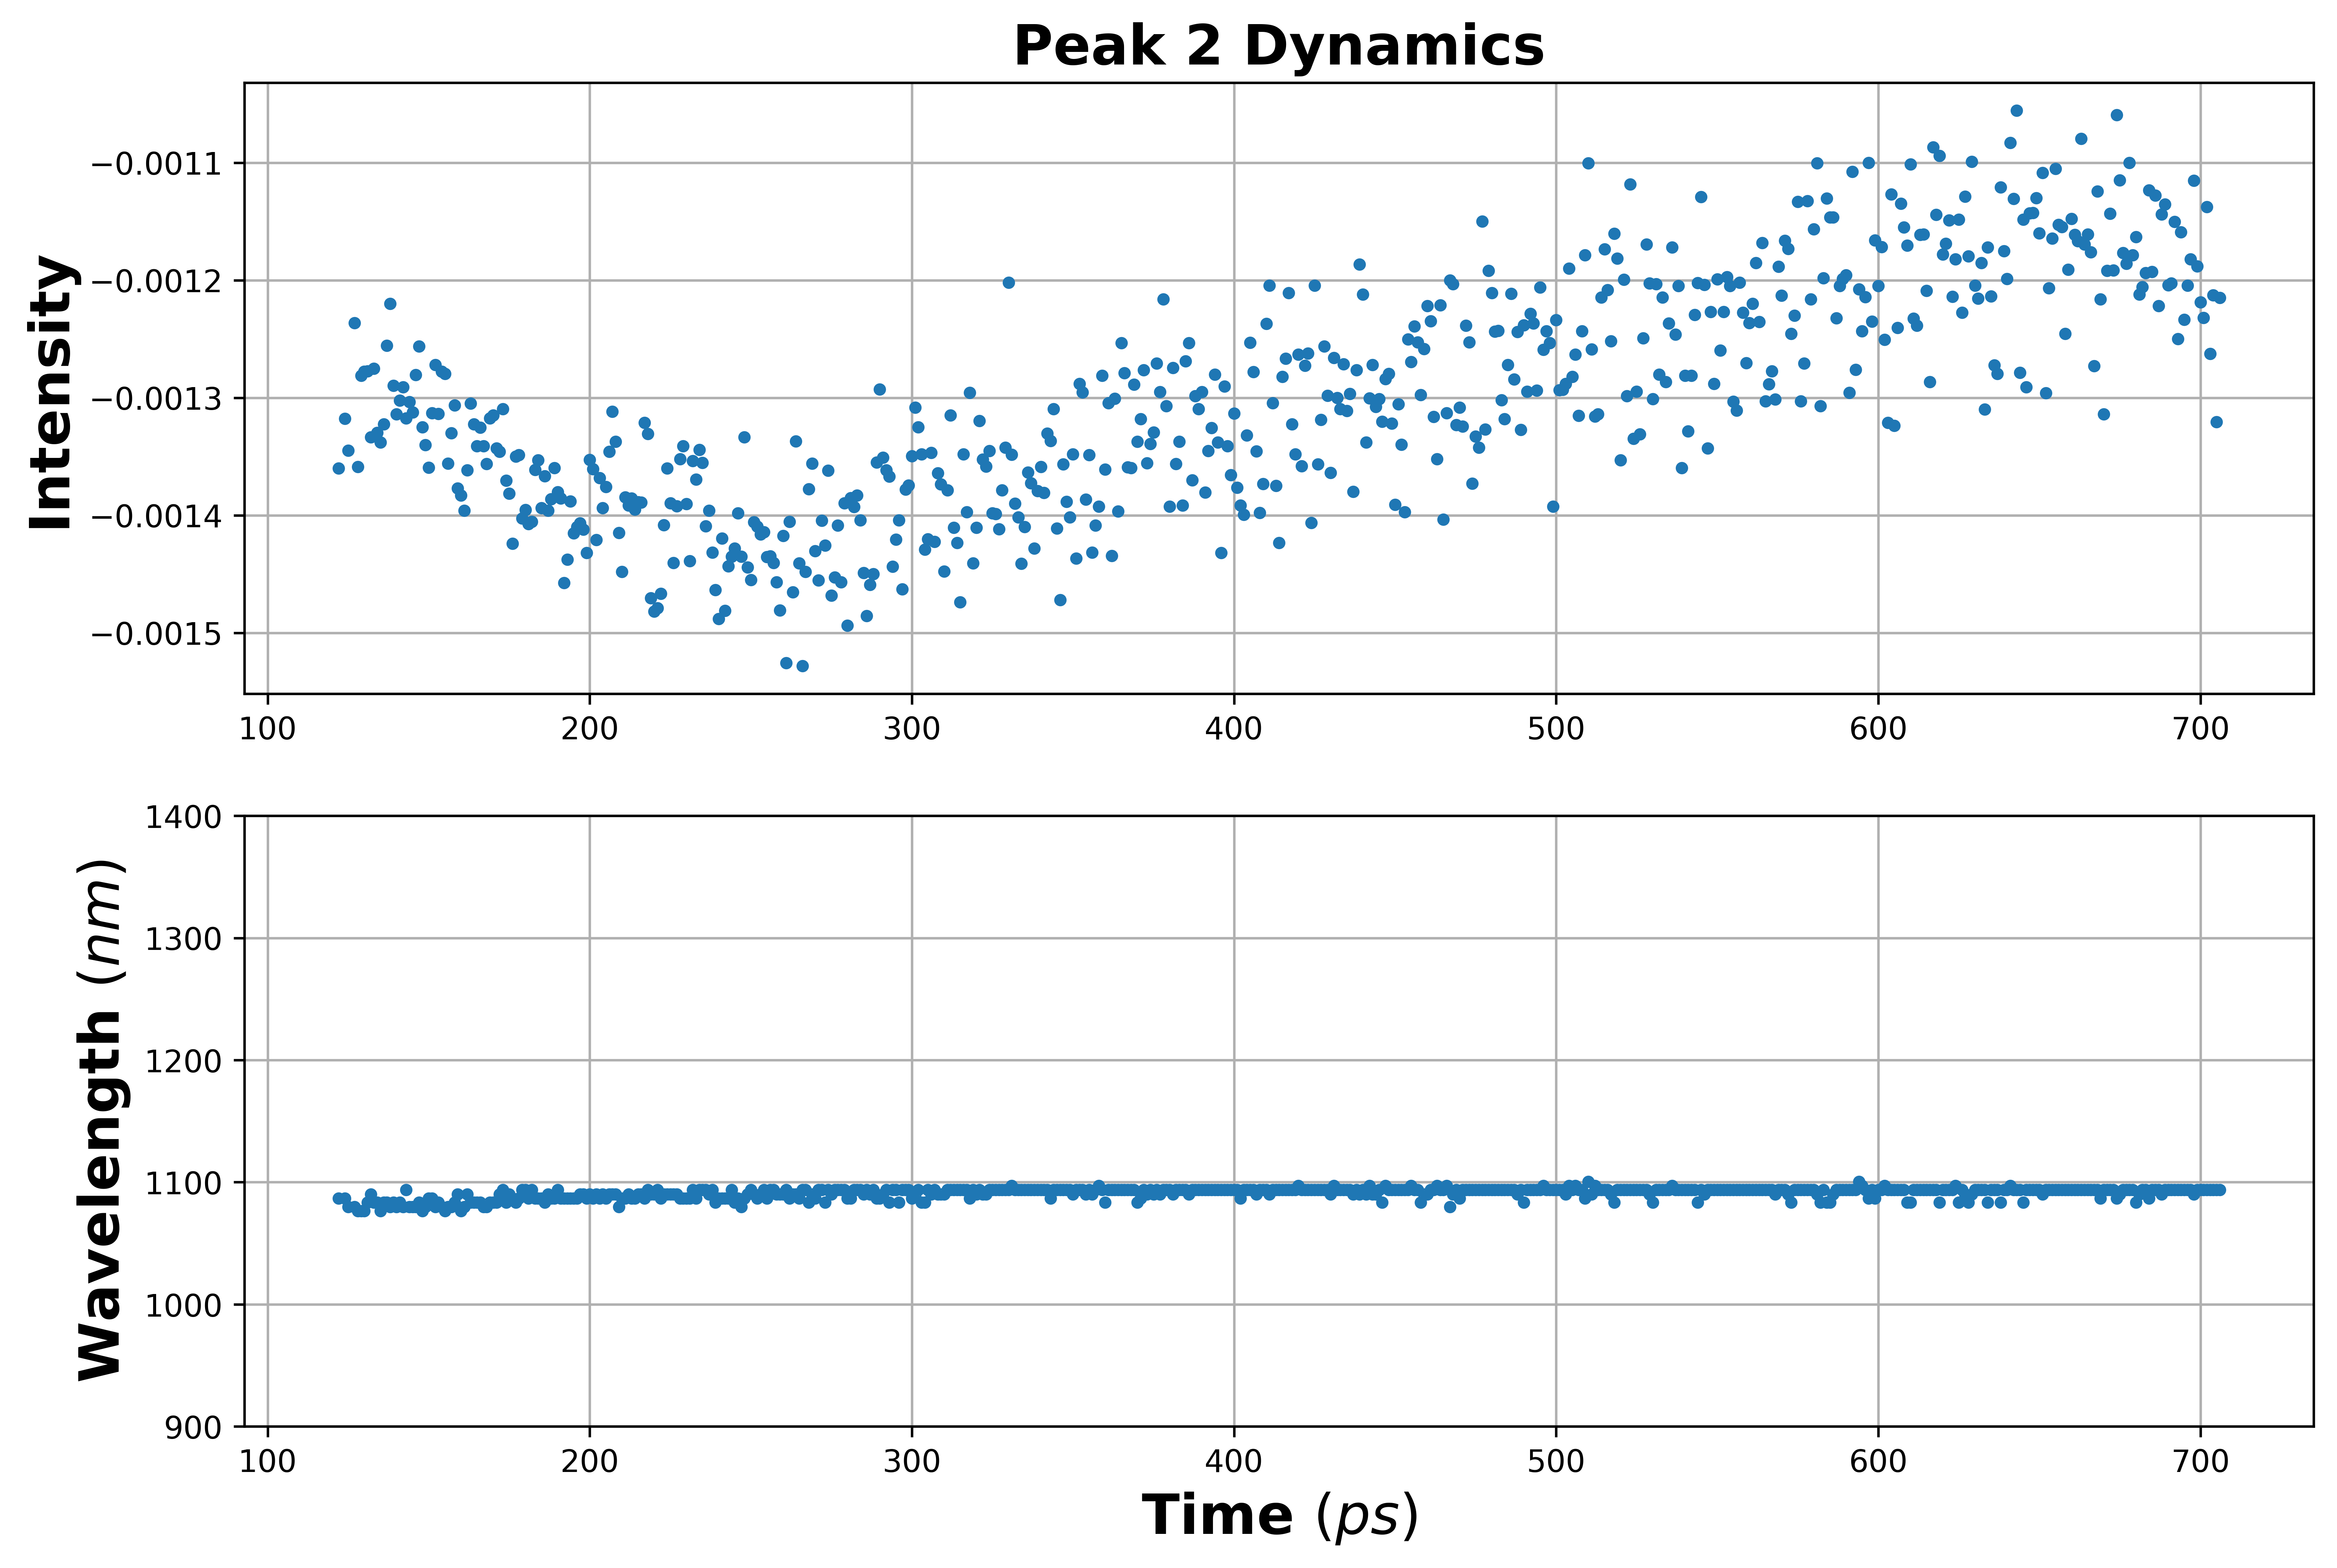

In [136]:
output = visualize(peak_dict, data_nm)

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit

def visualize(peak_dict, data_nm):
    for i in range(len(peak_dict)):
        nm_list = []
        df = pd.DataFrame(peak_dict['peak_%s' % i], 
        columns=['Position', 'Height', 'Width', 'Time'])
        df = df.drop_duplicates(subset= 'Time')
        df = df.reset_index(drop=True)
                
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), dpi=600)
        
        ax1.plot(df['Time'], df['Height'], '.')
        #ax1.plot(exp fit)
        #ax1.axis(between 0 and 1?)
        ax1.set_title('Peak %s Dynamics' % (i+1), fontsize=18, fontweight='bold')
        ax1.set_ylabel('Intensity', fontsize=18, fontweight='bold')
        ax1.grid()
        
        ax2.plot(df['Time'], df['Position'], '.')
        #ax2.plot(np.unique(df['Time']), np.poly1d(np.polyfit(df['Time'], df['Position'], 1))(np.unique(df['Time'])))
        ax2.set_ylabel('Position', fontsize=18, fontweight='bold')
        ax2.set_xlabel('Time $(ps)$', fontsize=18, fontweight='bold')
        ax2.set_ylim((0, 140))
        ax2.grid()
        
    return

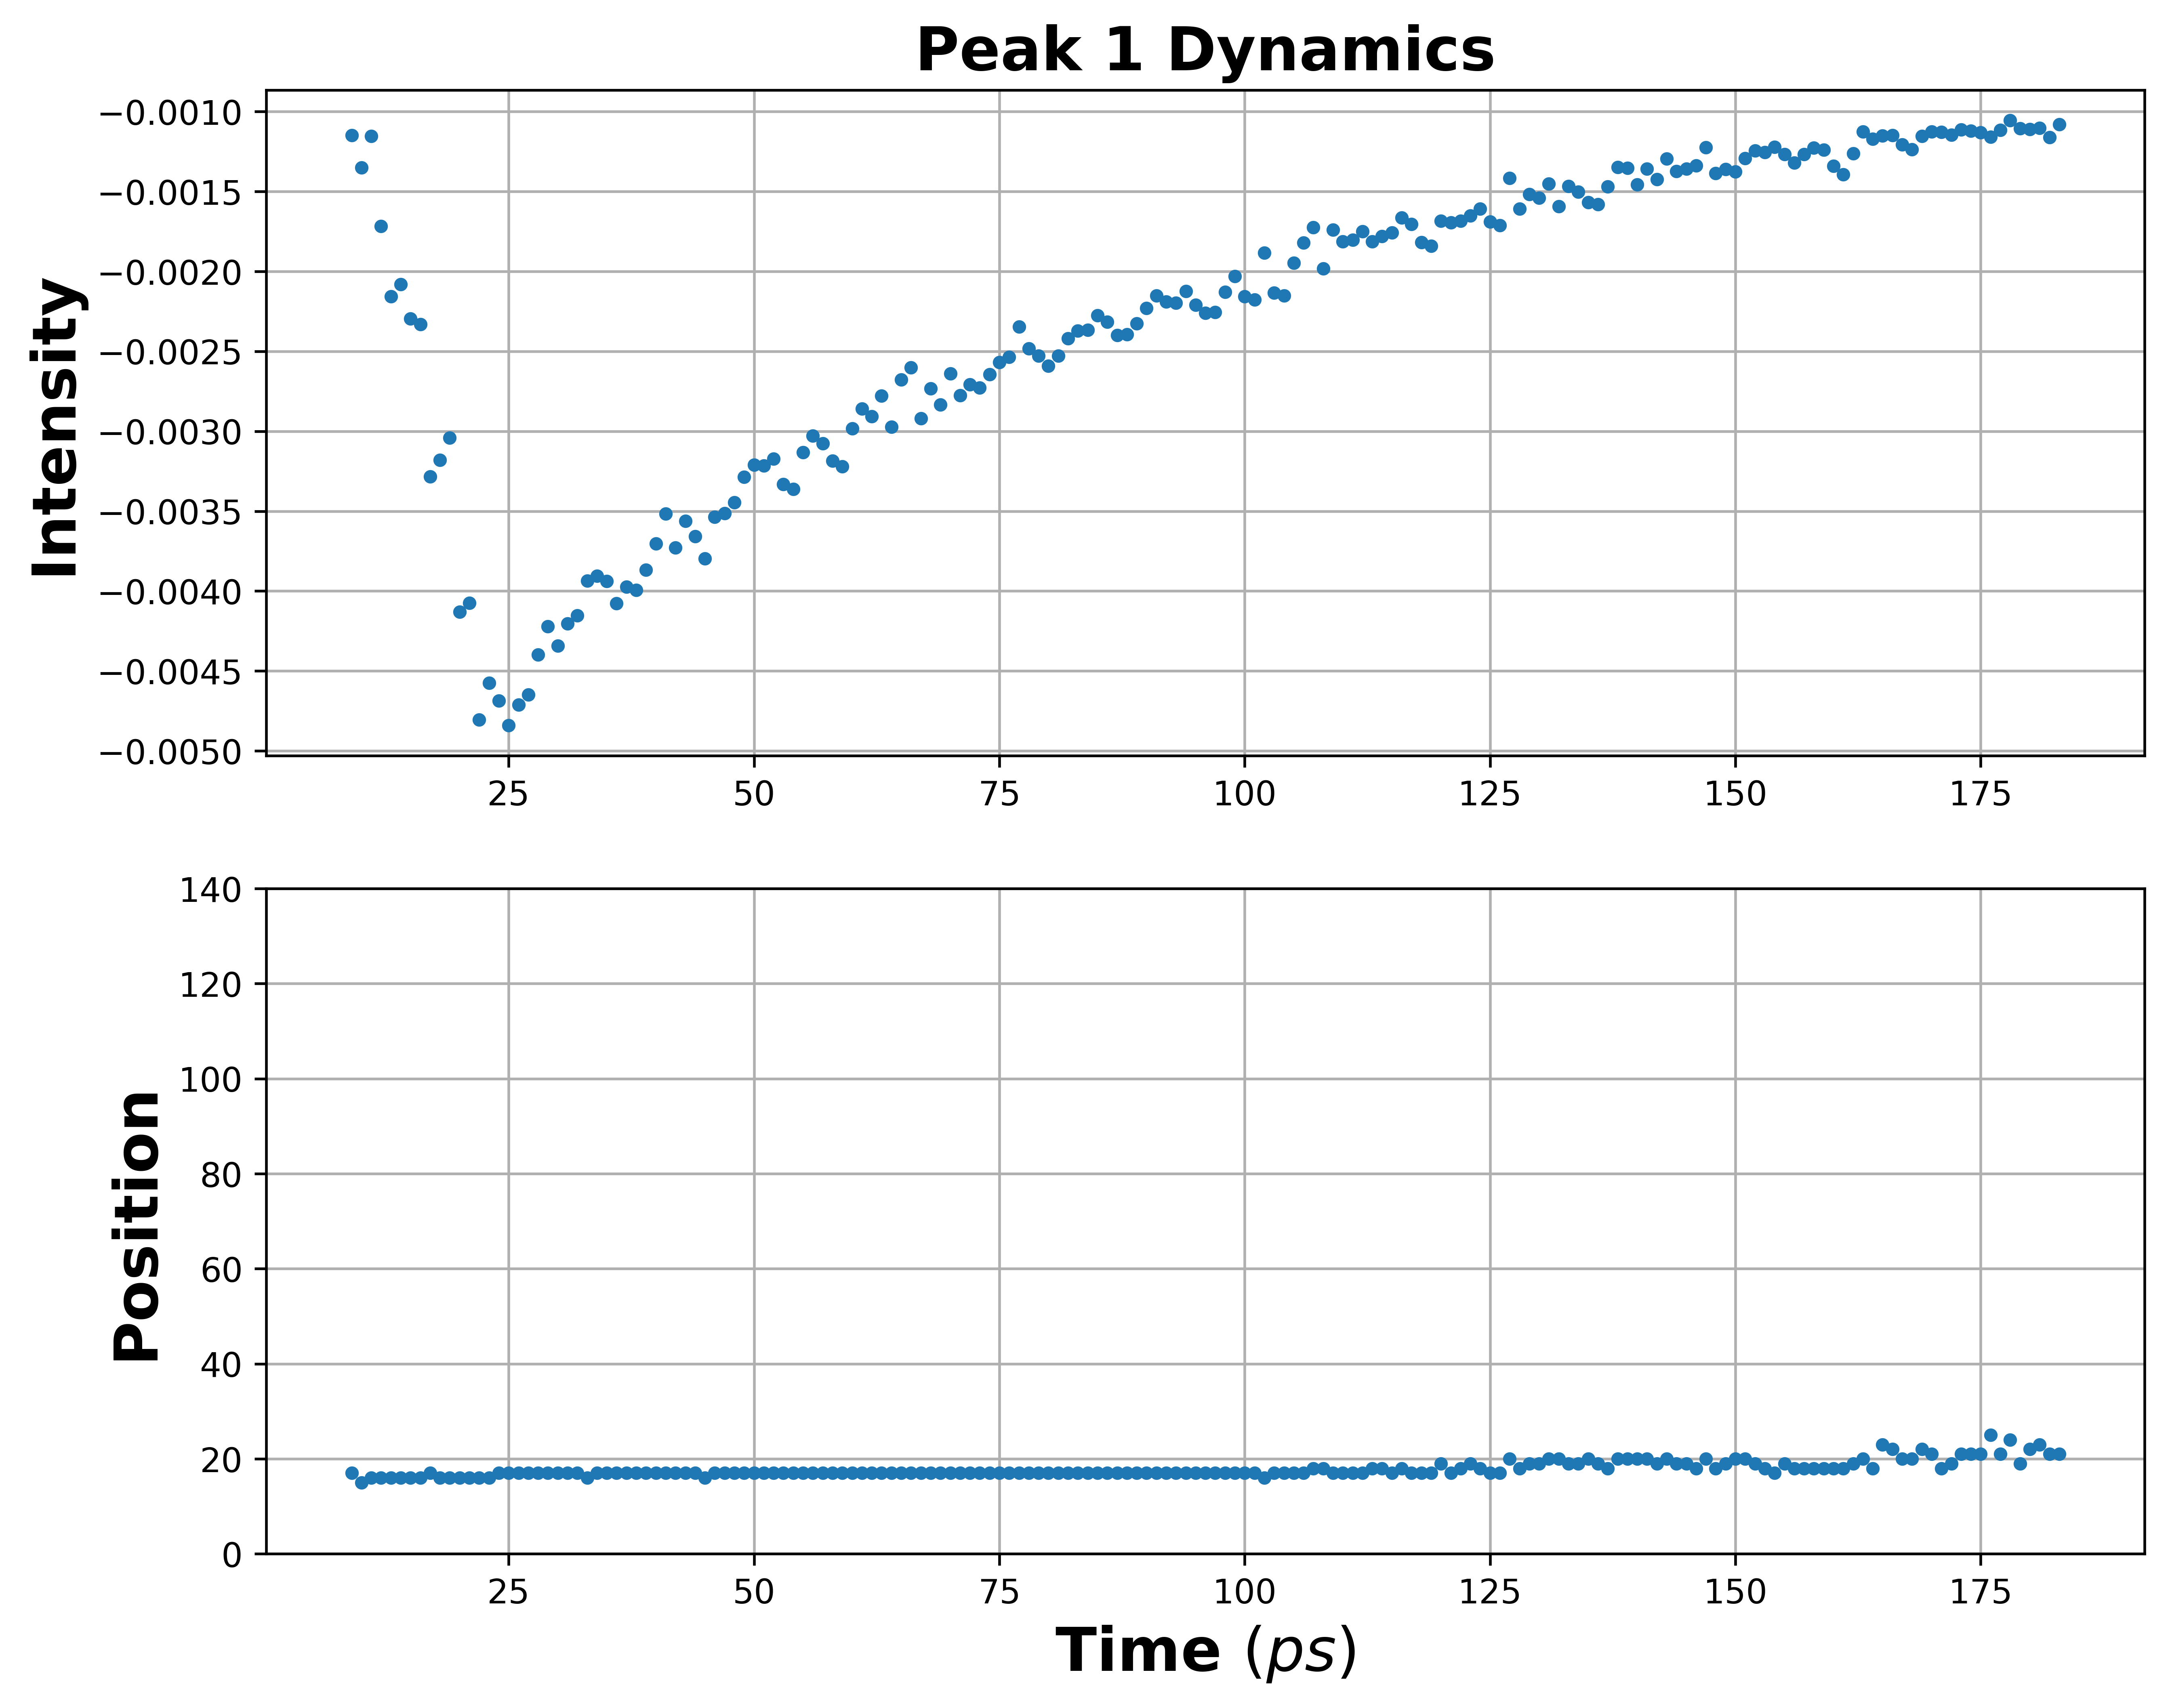

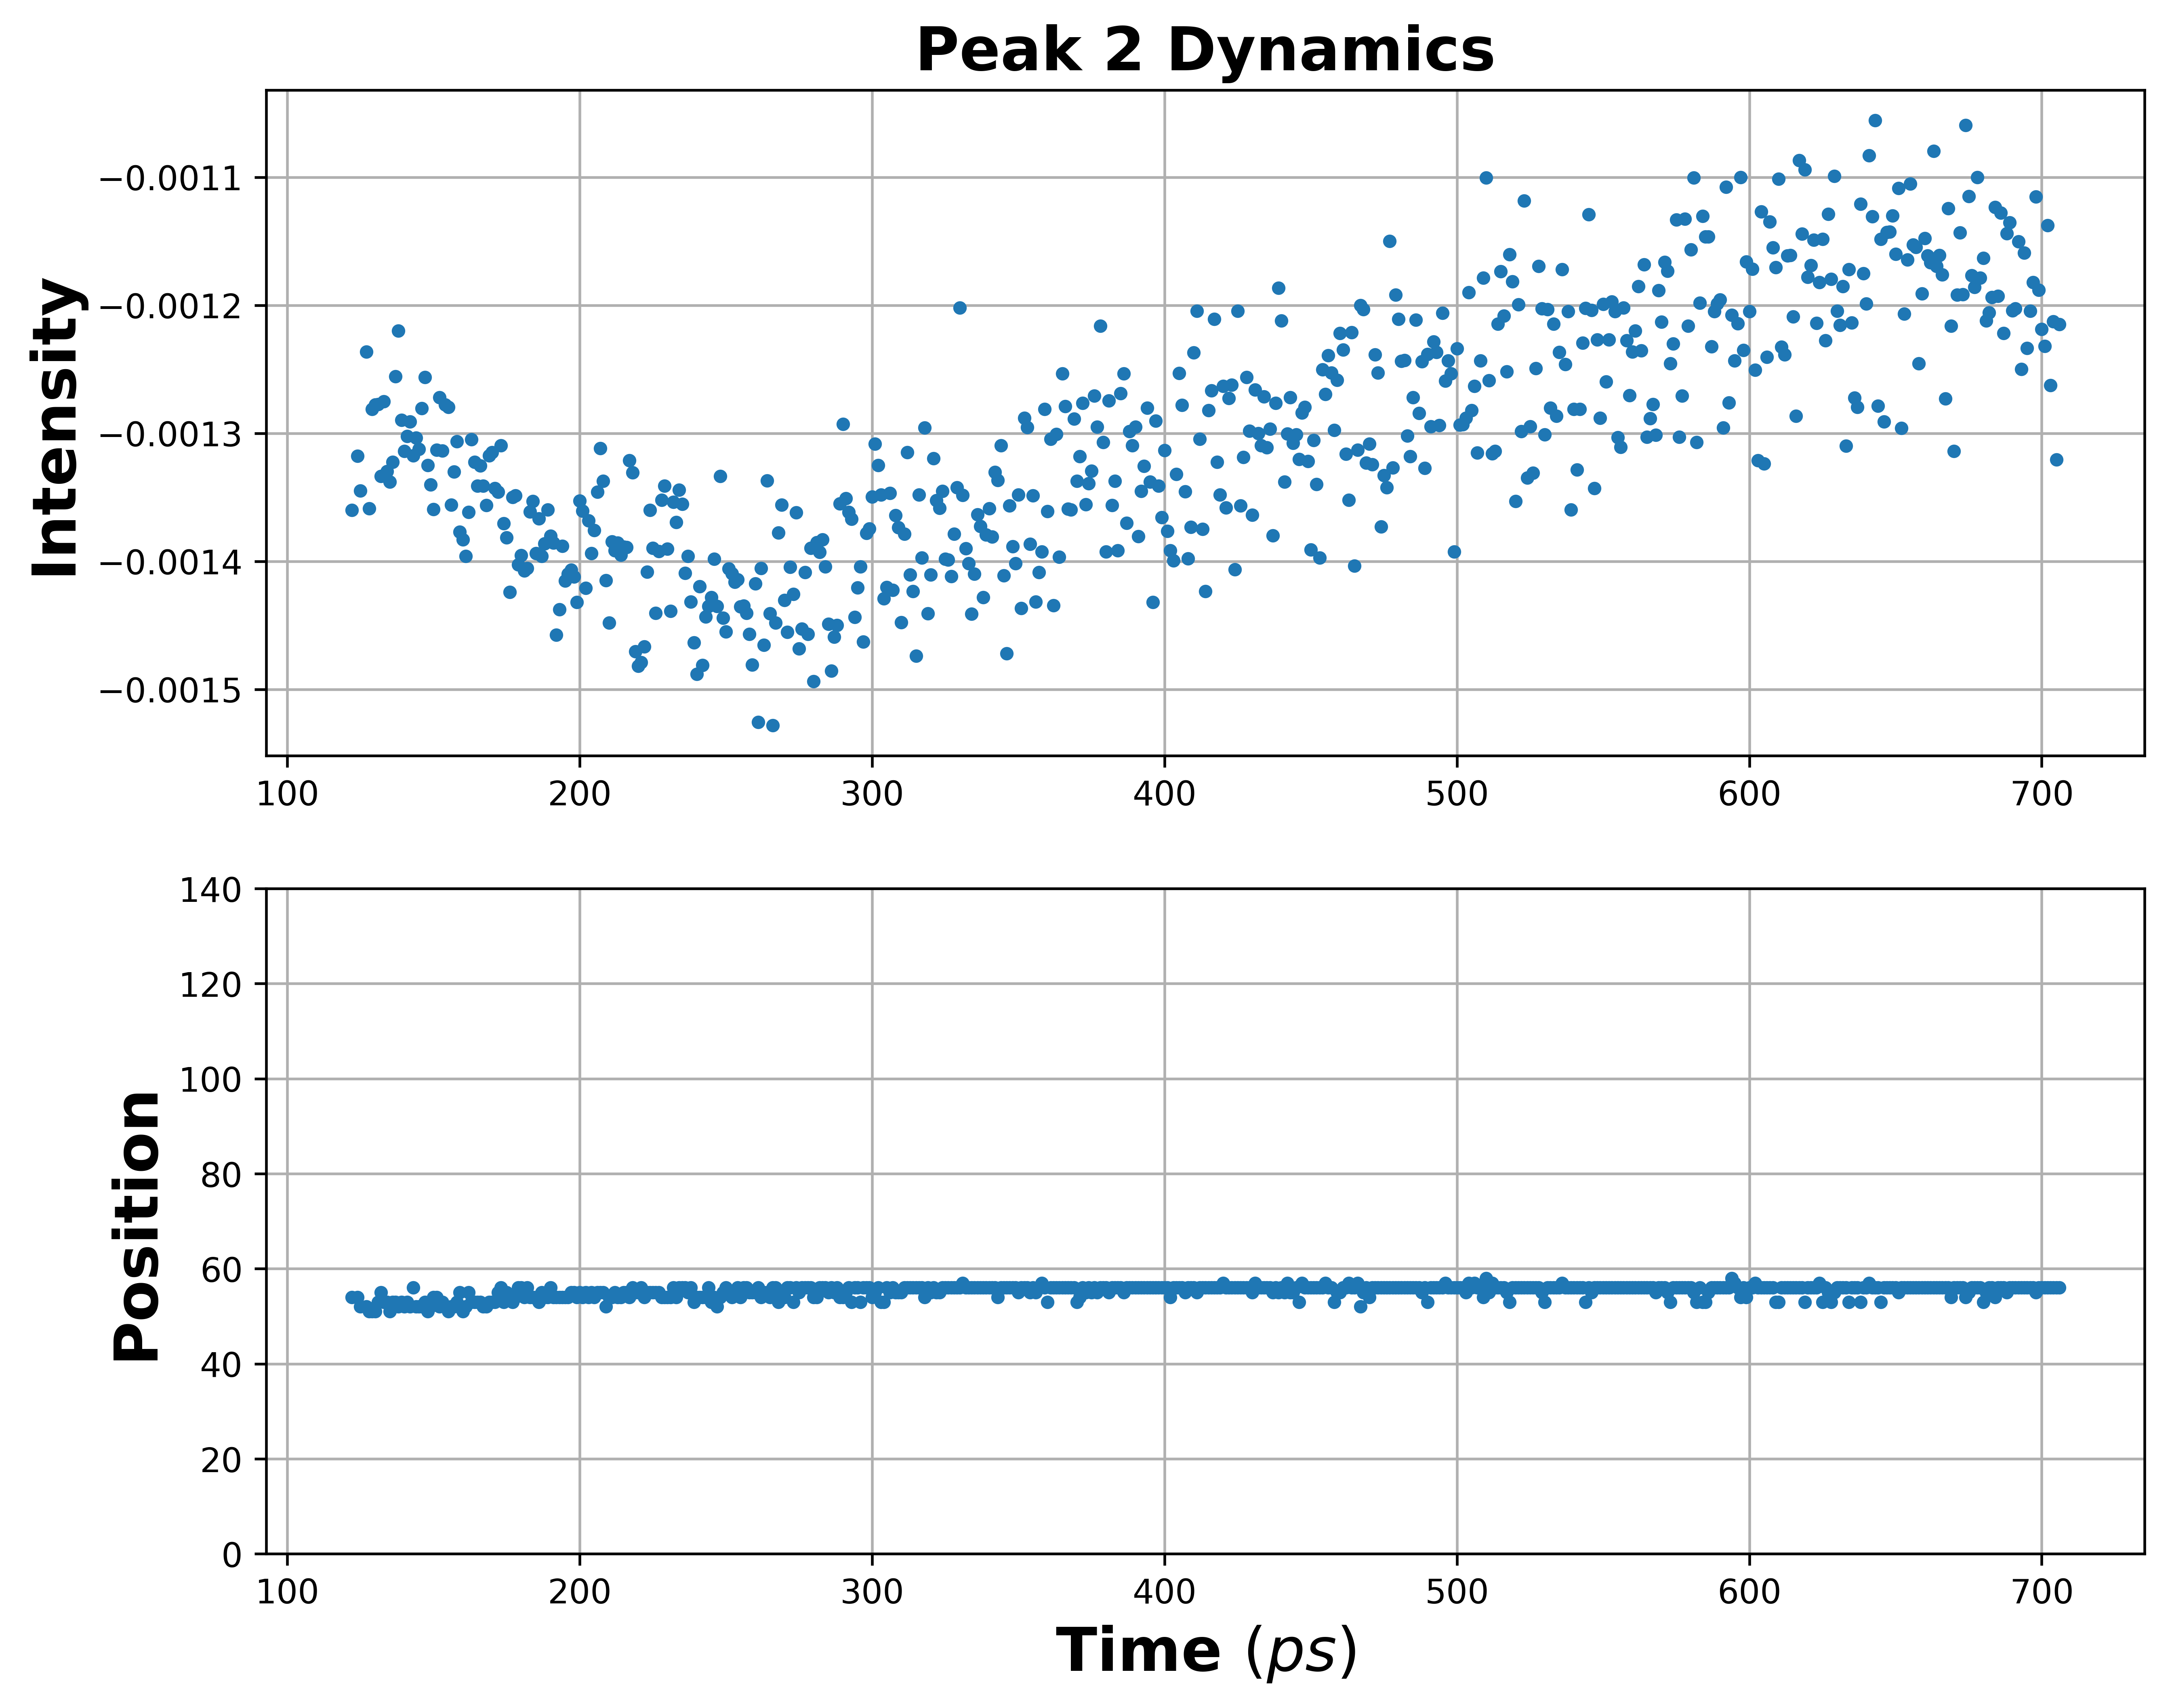

In [140]:
output2 = visualize(peak_dict, data_nm) 

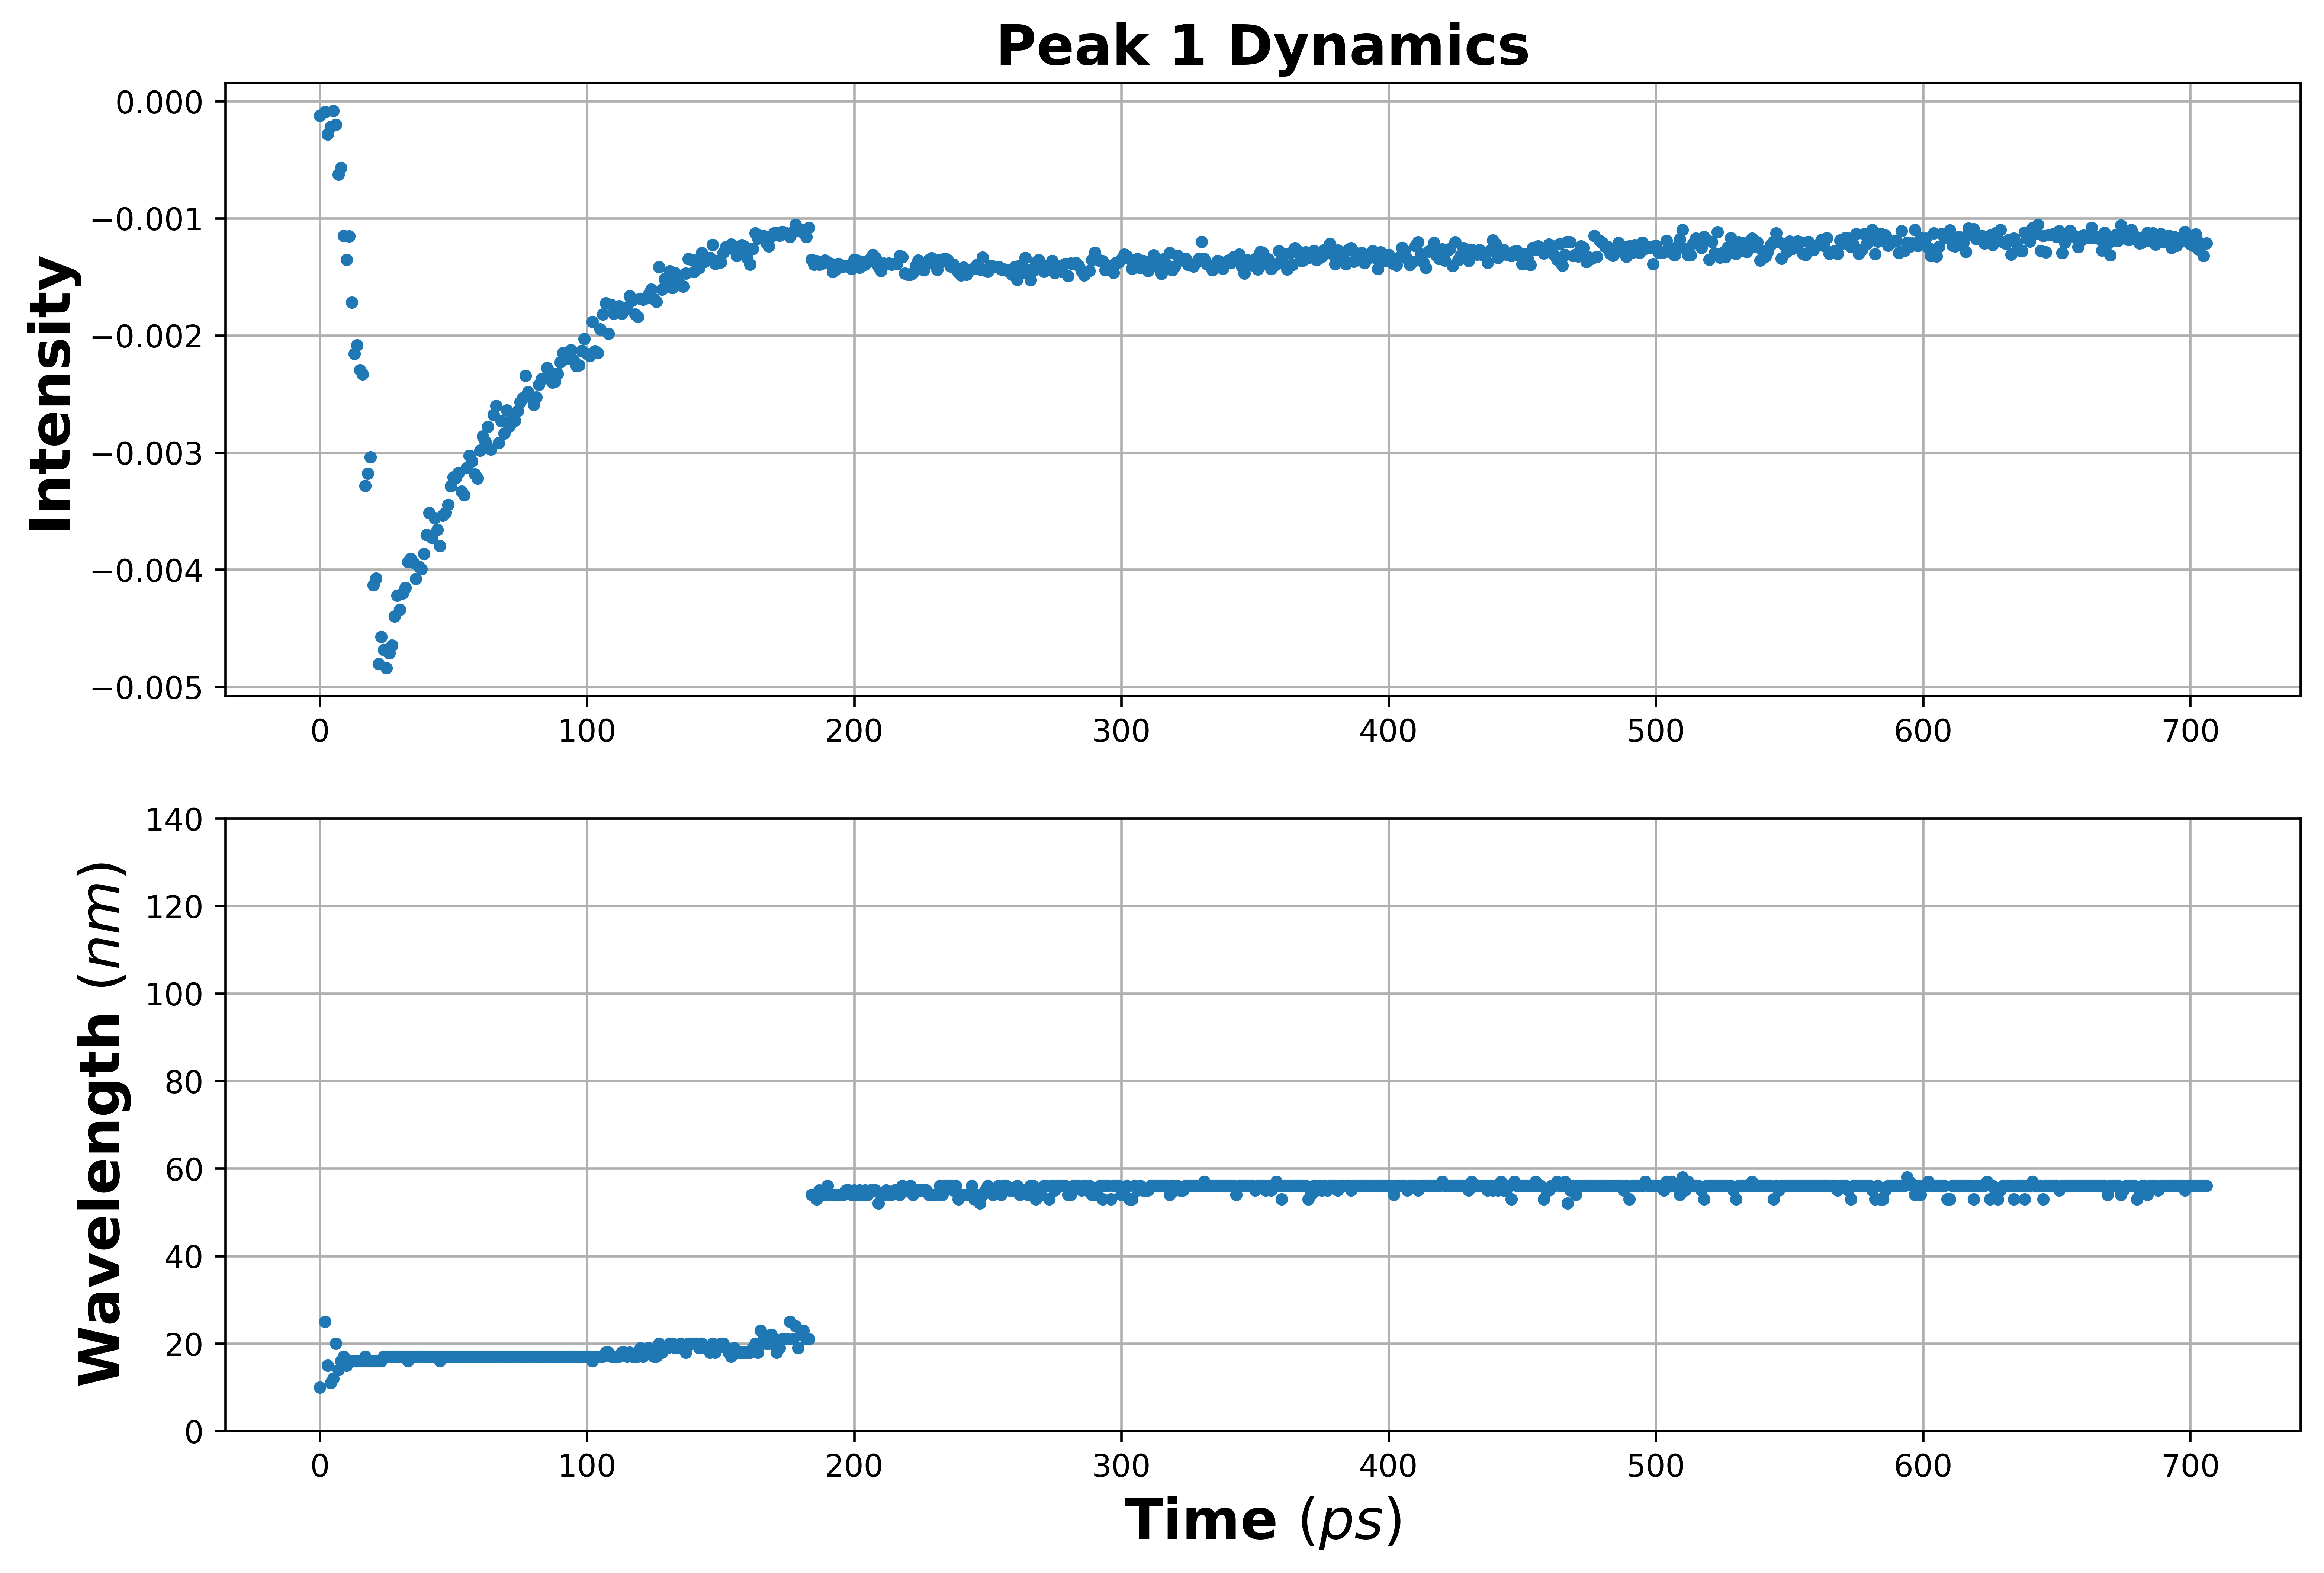

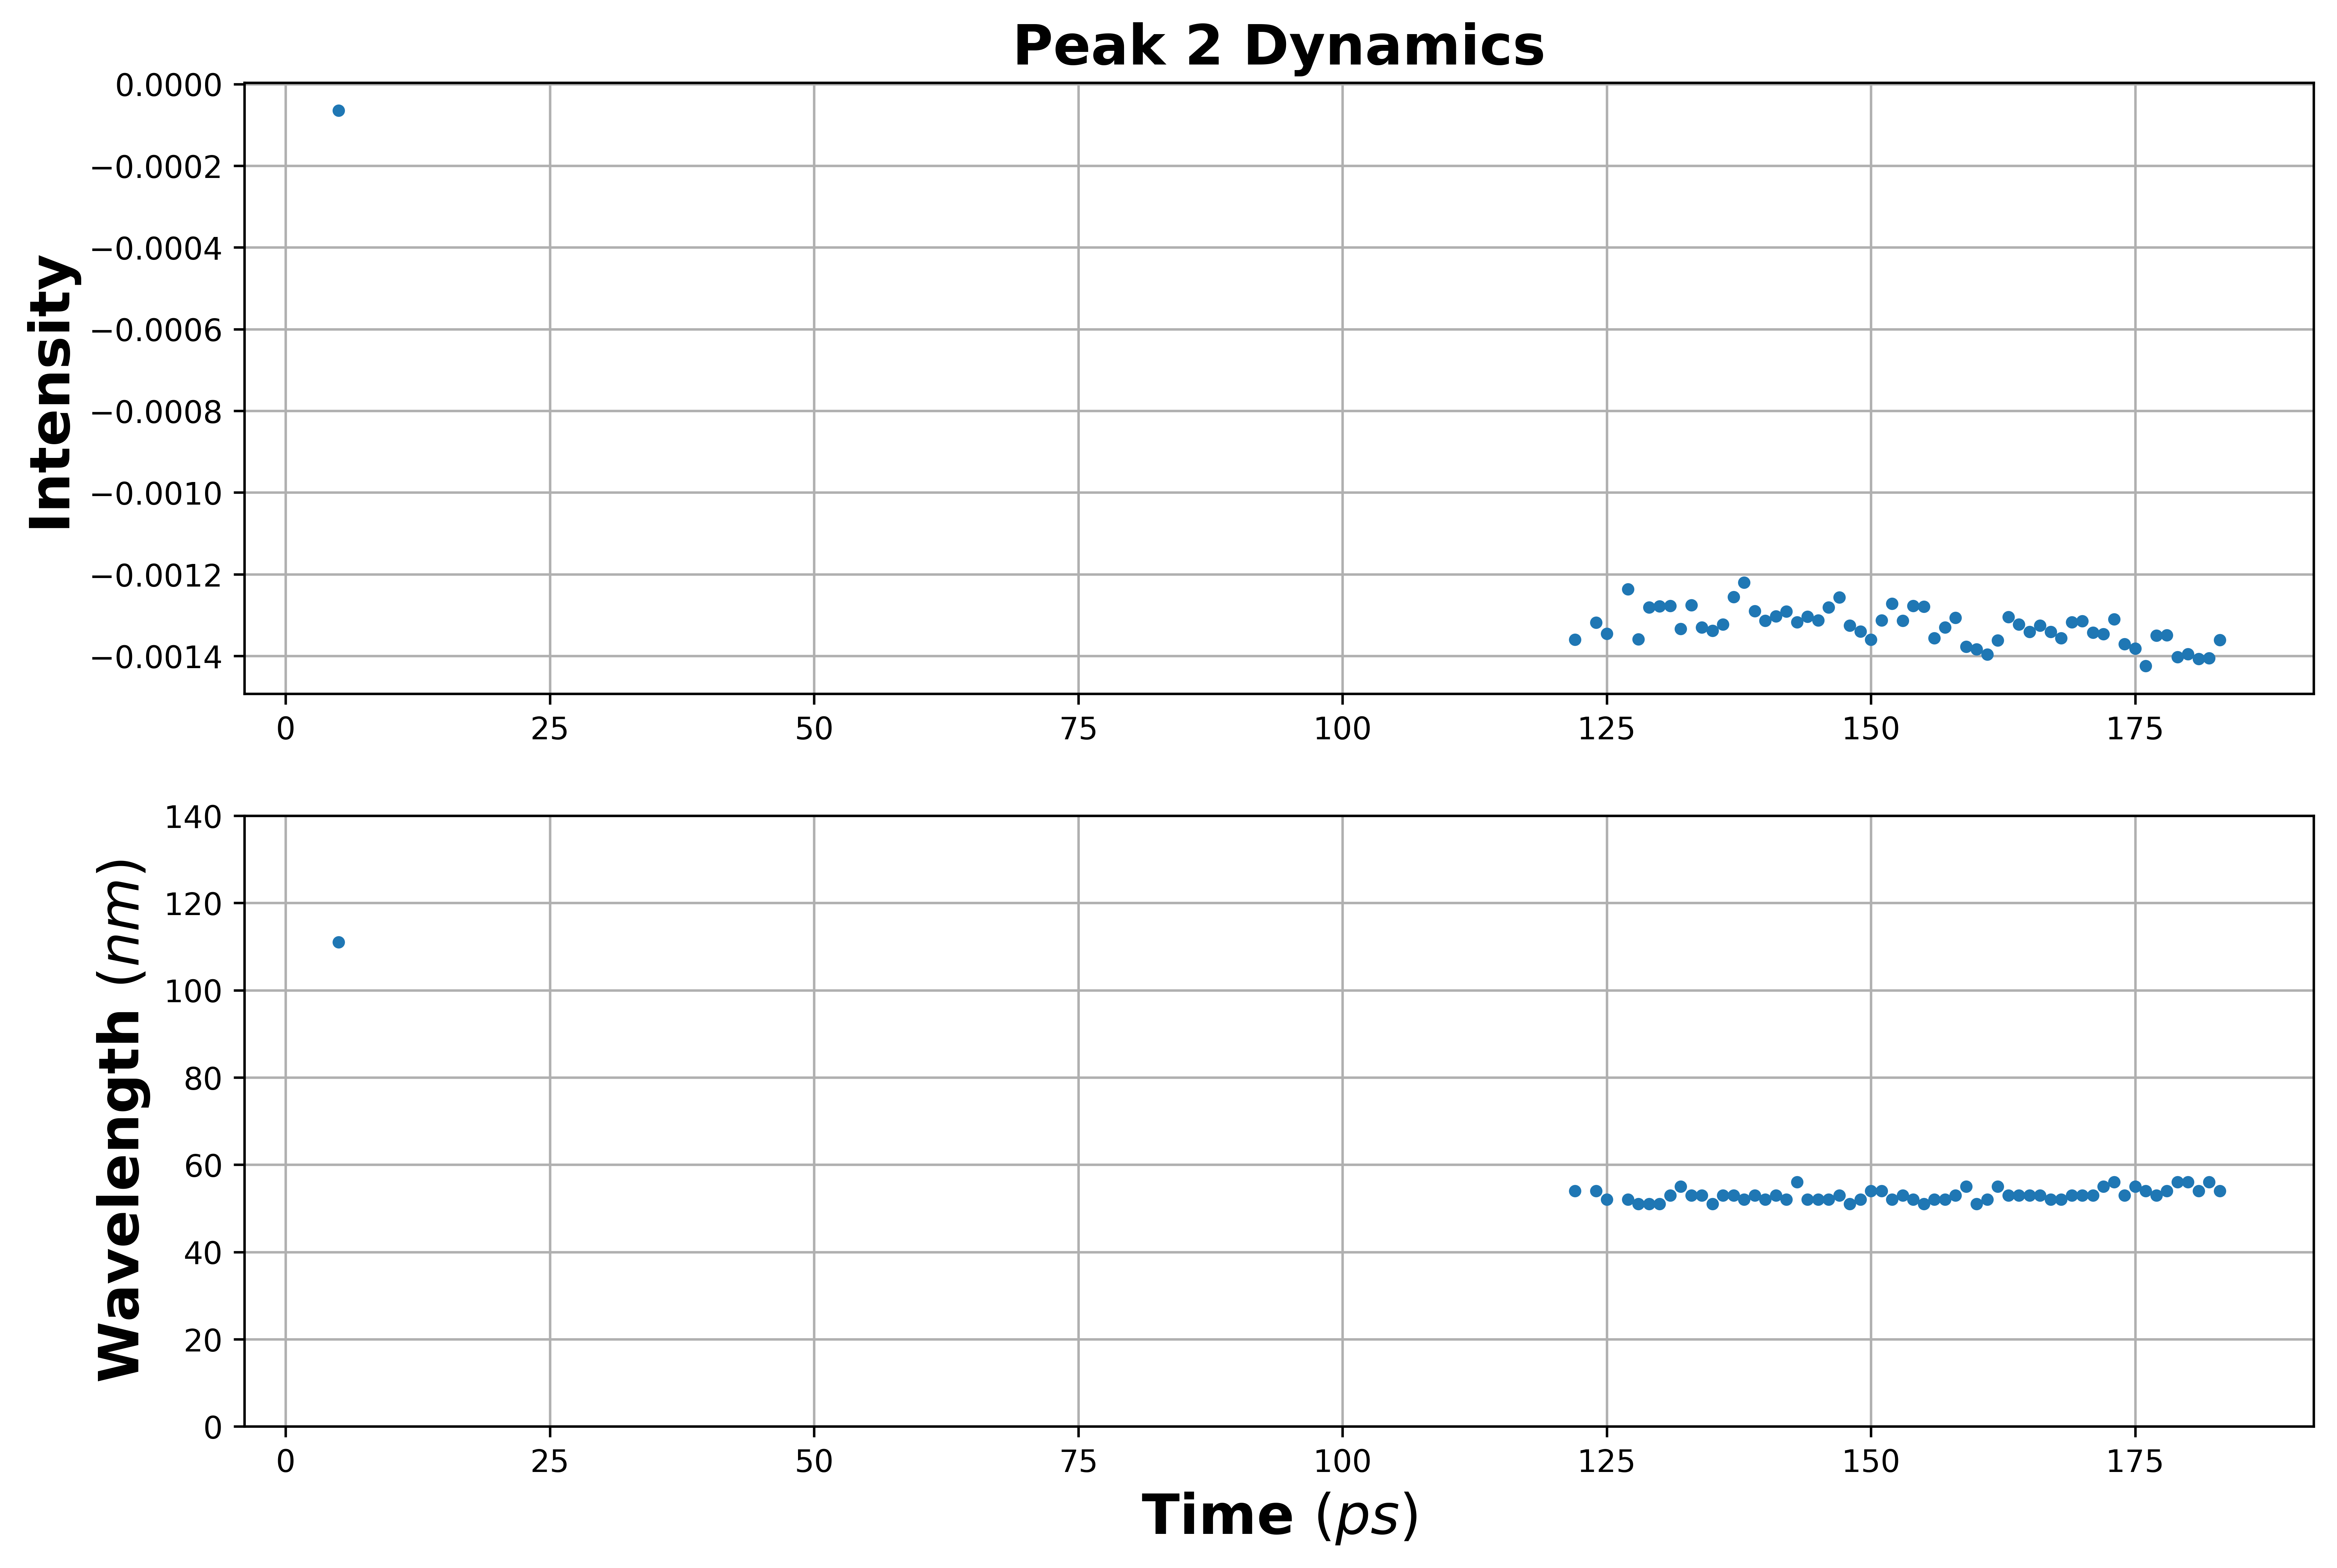

In [132]:
for i in range(idx.shape[1]):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), dpi=600)
        
    ax1.plot(height.loc[:, i], '.')
    #ax1.plot(exp fit)
    #ax1.axis(between 0 and 1?)
    ax1.set_title('Peak %s Dynamics' % (i+1), fontsize=18, fontweight='bold')
    ax1.set_ylabel('Intensity', fontsize=18, fontweight='bold')
    ax1.grid()
        
    ax2.plot(idx.loc[:, i], '.')
    #ax2.plot(np.unique(df['Time']), np.poly1d(np.polyfit(df['Time'], df['Position'], 1))(np.unique(df['Time'])))
    ax2.set_ylabel('Wavelength $(nm)$', fontsize=18, fontweight='bold')
    ax2.set_xlabel('Time $(ps)$', fontsize=18, fontweight='bold')
    ax2.set_ylim((0, 140))
    ax2.grid()

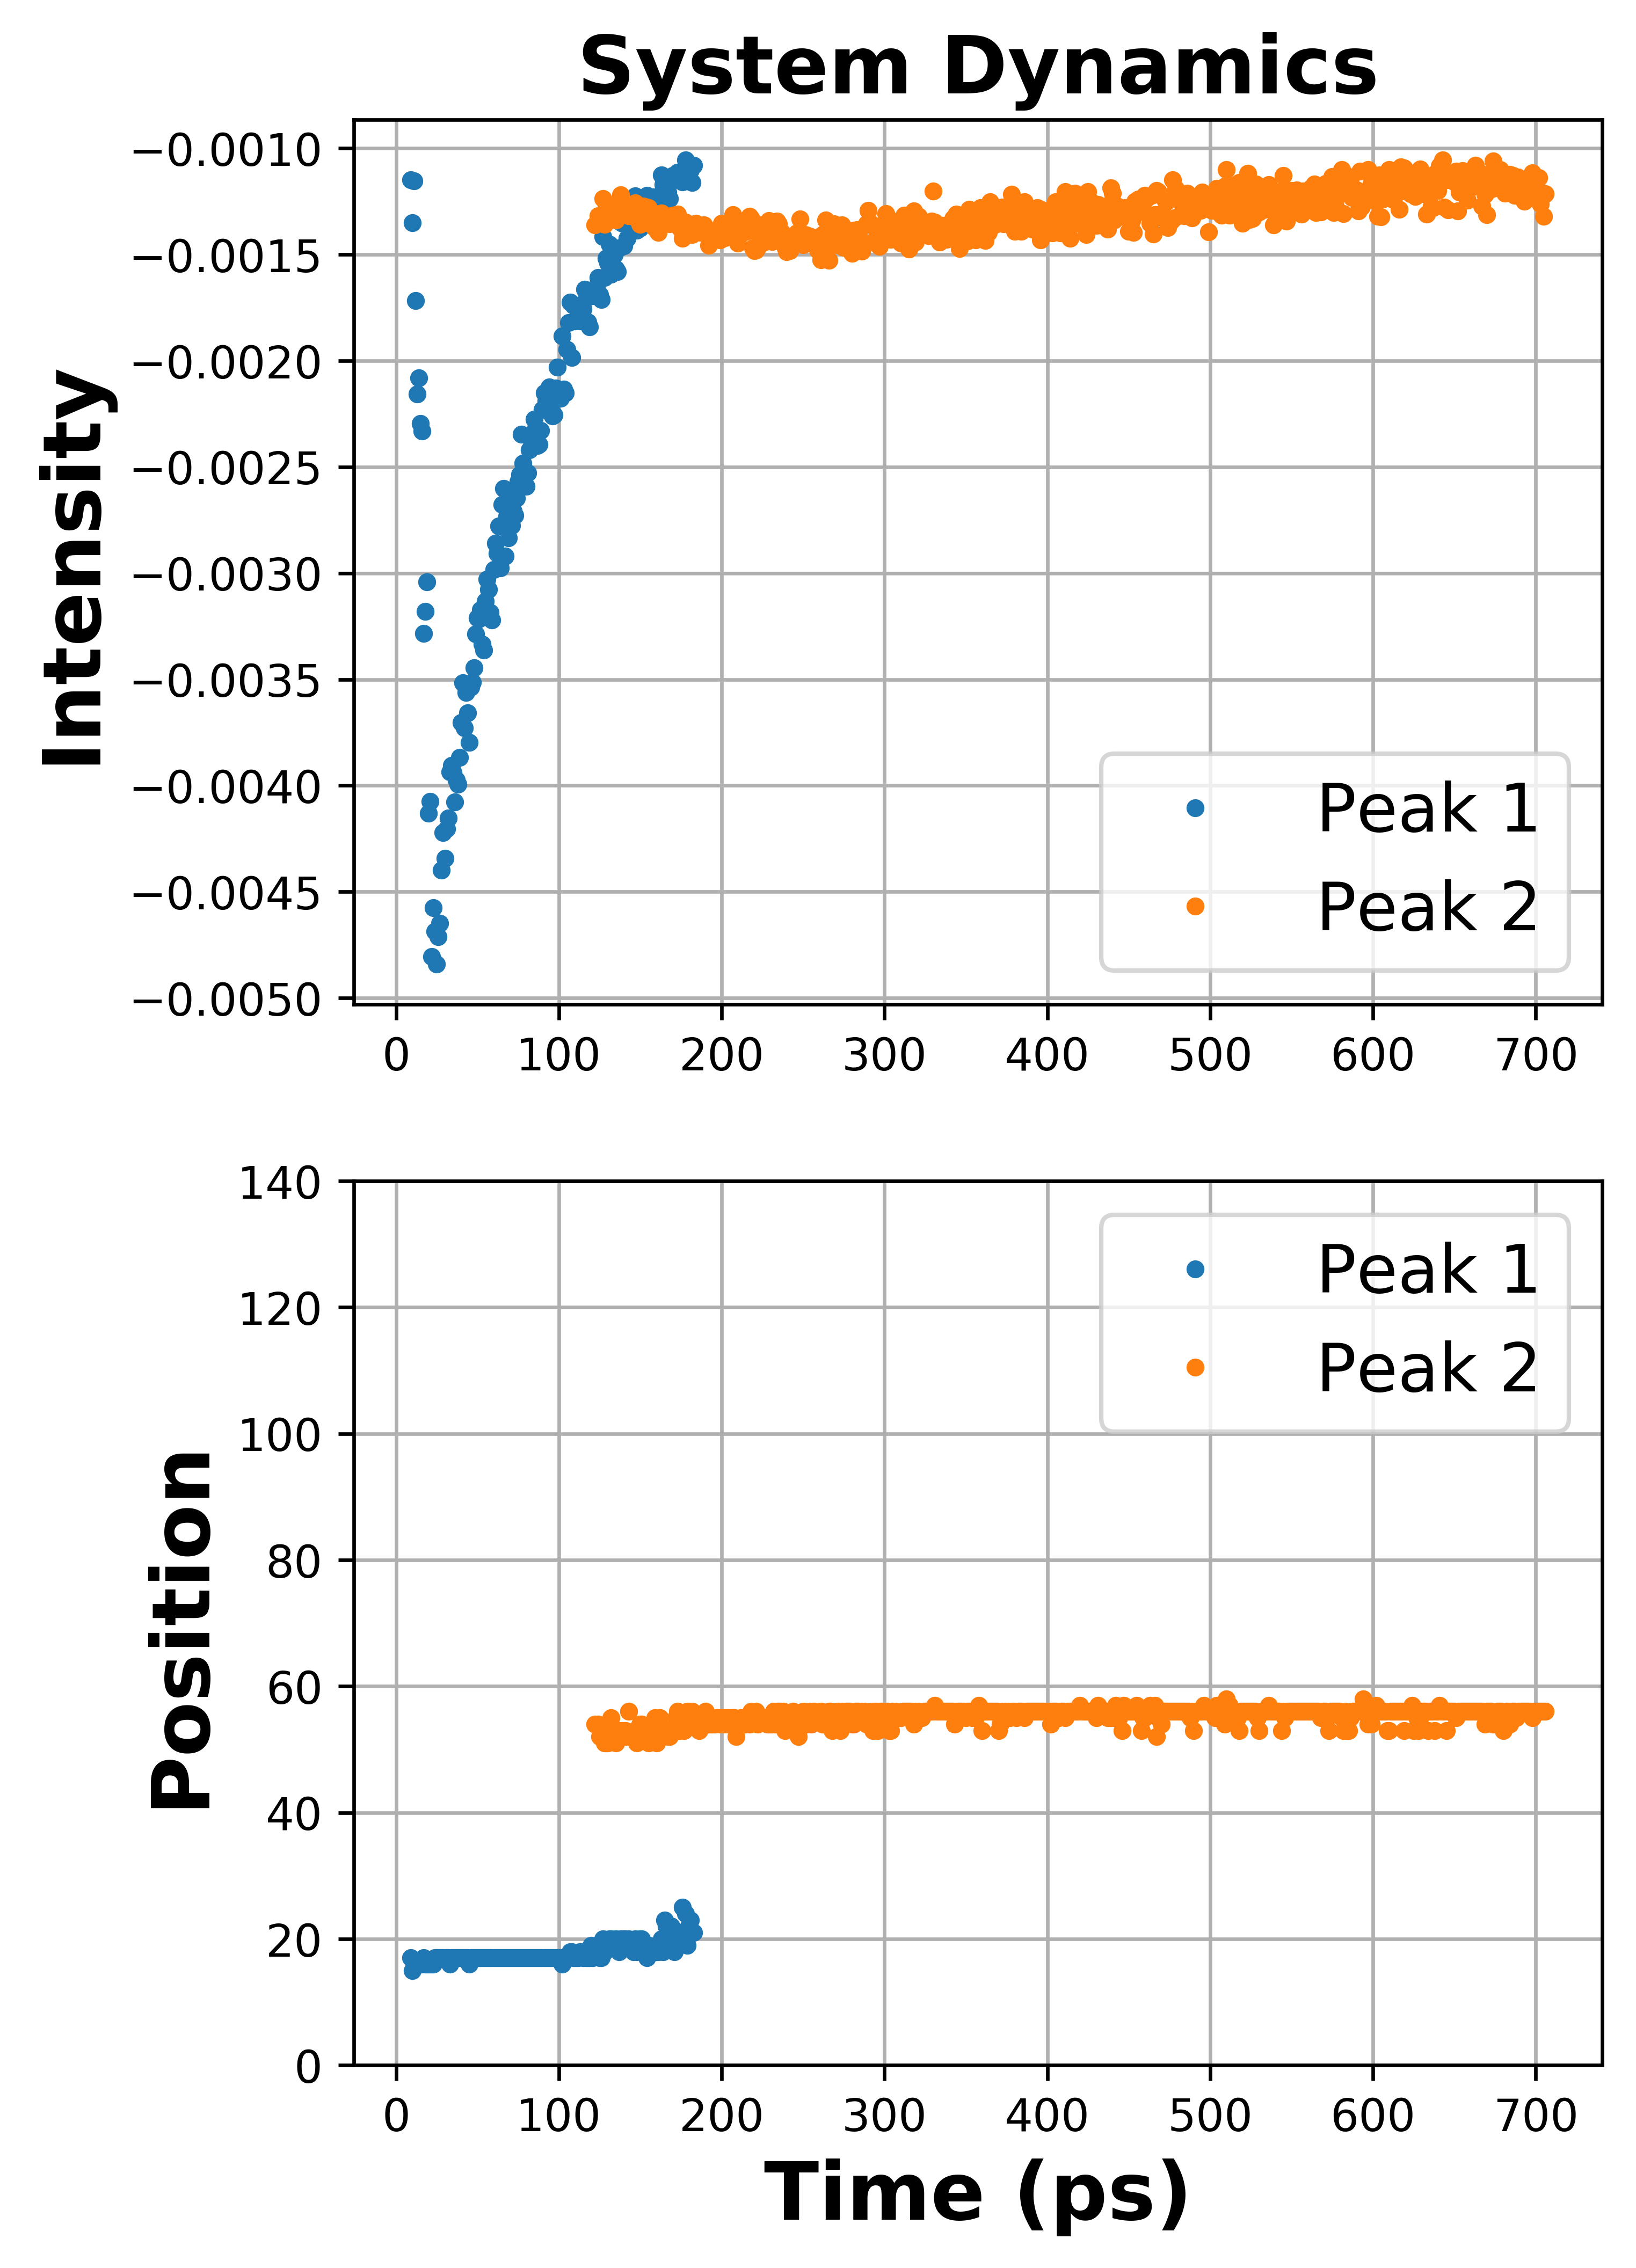

In [156]:
df1 = pd.DataFrame(peak_dict['peak_0'], 
        columns=['Position', 'Height', 'Width', 'Time'])
df1 = df1.drop_duplicates(subset= 'Time')
df1 = df1.reset_index(drop=True)

df2 = pd.DataFrame(peak_dict['peak_1'], 
        columns=['Position', 'Height', 'Width', 'Time'])
df2 = df2.drop_duplicates(subset= 'Time')
df2 = df2.reset_index(drop=True)
        
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8), dpi=600)
        
ax1.plot(df1['Time'], df1['Height'], '.', label= 'Peak 1')
ax1.plot(df2['Time'], df2['Height'], '.', label= 'Peak 2')
#ax1.plot(exp fit)
#ax1.axis(between 0 and 1?)
ax1.set_title('System Dynamics', fontsize=18, fontweight='bold')
ax1.set_ylabel('Intensity', fontsize=18, fontweight='bold')
ax1.legend(fontsize=15)
ax1.grid()
    
ax2.plot(df1['Time'], df1['Position'], '.', label= 'Peak 1')
ax2.plot(df2['Time'], df2['Position'], '.', label= 'Peak 2')
#ax2.plot(np.unique(df['Time']), np.poly1d(np.polyfit(df['Time'], df['Position'], 1))(np.unique(df['Time'])))
ax2.set_ylabel('Position', fontsize=18, fontweight='bold')
ax2.set_xlabel('Time (ps)', fontsize=18, fontweight='bold')
ax2.set_ylim((0, 140))
ax2.legend(fontsize=15)
ax2.grid()

In [158]:
nm_range = 
abc = plot_decay(data_nm, data_time, 1400, data_z)

TypeError: 'int' object is not iterable

In [175]:
data_time.shape

(173,)

In [159]:
def twodcontourplot(tadata_nm, tadata_timedelay, tadata_z_corr):
    """
    make contour plot
    
    Args:
        tadata_nm: wavelength array
        tadata_timedelay: time delay array
        tadata_z_corr: matrix of z values
        
    """
    nm, timedelay = np.linspace(tadata_nm.min(), tadata_nm.max(), 100), np.linspace(tadata_timedelay.min(), tadata_timedelay.max(), 100)    
    timedelayi, nmi = np.meshgrid(tadata_timedelay, tadata_nm)

    #find the maximum and minimum
    #these are used for color bar
    z_min = np.amin(np.amin(tadata_z_corr, axis = 1))
    z_max = np.amax(np.amax(tadata_z_corr, axis = 1))

    
    return [nmi, timedelayi, z_min, z_max]

TypeError: Dimensions of C (144, 707) are incompatible with X (173) and/or Y (144); see help(pcolormesh)

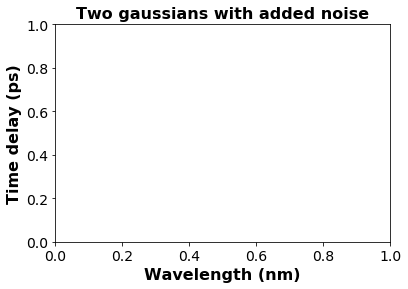

In [161]:
original_contour = twodcontourplot(data_nm, data_time, data_z)
nm_contour, time_contour, min_contour, max_contour = original_contour[0], original_contour[1], original_contour[2], original_contour[3]

plt.figure()
#plt.xlim(450,800)
plt.title('Two gaussians with added noise', fontsize = 16, fontweight = 'bold')
#plt.ylim(0,50)
plt.xlabel('Wavelength (nm)', fontsize = 16, fontweight = 'bold')
plt.ylabel('Time delay (ps)', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.pcolormesh(nm_contour, time_contour, data_z, cmap = 'PiYG', vmin=min_contour, vmax=max_contour)
plt.colorbar()
plt.tight_layout(pad=0.25, h_pad=None, w_pad=None, rect=None)